<a href="https://colab.research.google.com/github/omaralonsoinfo/MineriaDeDatos/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 9

In [17]:
import numpy as np

observados = np.array([3, 7, 5, 10])
predichos = np.array([2, 8, 4, 9])

# Calcula los errores
errores = observados - predichos

# Calcula MSE y RMSE de forma más directa
mse = np.square(errores).mean()
rmse = np.sqrt(mse)

print(f"Los errores son: {errores}")
print(f"El MSE es: {mse}")
print(f"El RMSE final es: {rmse}")

Los errores son: [ 1 -1  1  1]
El MSE es: 1.0
El RMSE final es: 1.0


Pregunta 10

In [18]:
# Definición de probabilidades agrupadas por máquina
maquinas = {
    'A': {'produccion': 0.60, 'defecto': 0.02},
    'B': {'produccion': 0.40, 'defecto': 0.05}
}

# 1. Calcula la Probabilidad Total de defecto P(D)
prob_defecto_total = sum(maq['produccion'] * maq['defecto'] for maq in maquinas.values())

# 2. Aplica el Teorema de Bayes para P(B|Defecto)
p_b_dado_defectuosa = (maquinas['B']['produccion'] * maquinas['B']['defecto']) / prob_defecto_total

print(f"Probabilidad de que sea de la máquina B: {p_b_dado_defectuosa}")

Probabilidad de que sea de la máquina B: 0.6250000000000001


Acontinuación se te presenta una simulación de un caso en el que se pretende determinar si el consumo de café por los estudiantes ayuda a estudiar.

Imagina que seleccionas a 20 estudiantes al azar. A 10 les das café y a otros 10 les das agua, luegos les pides que resuelvan un examen de lógica.

In [1]:
import pandas as pd
import numpy as np


# Establece una semilla para reproducibilidad
np.random.seed(42)


# 1. Crea una lista de matrículas de estudiantes
student_ids = [f'{i:06d}' for i in range(172120, 172120 + 20)]


# 2. Asigna 10 estudiantes al grupo 'Café' y 10 al grupo 'Agua'
groups = ['Café'] * 10 + ['Agua'] * 10
np.random.shuffle(groups)


# 3. Simula calificacionen de examenes para el grupo café
# Mean=70, Std=5, asegurate de que los valores estén entre (50-100)
coffee_scores = np.random.normal(loc=70, scale=5, size=10).round(0)
coffee_scores = np.clip(coffee_scores, 50, 100).astype(int)


# 4. Simula calificaciones de examen para el grupo de 'Agua'
# Mean=75, Std=5, asegurate de que los valores estén entre (50-100)
water_scores = np.random.normal(loc=75, scale=5, size=10).round(0)
water_scores = np.clip(water_scores, 50, 100).astype(int)


# Combina los valores basado en el grupo
exam_scores = []
coffee_idx = 0
water_idx = 0
for group in groups:
    if group == 'Café':
        exam_scores.append(coffee_scores[coffee_idx])
        coffee_idx += 1
    else:
        exam_scores.append(water_scores[water_idx])
        water_idx += 1


# 5. Combina en un DataFrame de Pandas
df_students = pd.DataFrame({
    'Matrícula': student_ids,
    'Grupo': groups,
    'Calificaciones': exam_scores
})


print("Datos simulados:")
print(df_students.head())

Datos simulados:
  Matrícula Grupo  Calificaciones
0    172120  Café              77
1    172121  Agua              77
2    172122  Agua              79
3    172123  Café              78
4    172124  Café              58


Calcula la media (promedio) de los estudiantes que consumen agua



In [2]:
mean_water = df_students[df_students['Grupo'] == 'Agua']['Calificaciones'].mean()
print(mean_water)

74.9


Calcula la media (promedio) de los estudiantes que consumen café

In [3]:
coffee_scores = np.random.normal(loc=70, scale=5, size=10).round(0)
coffee_scores = np.clip(coffee_scores, 50, 100).astype(int)

print(coffee_scores.mean())

70.6


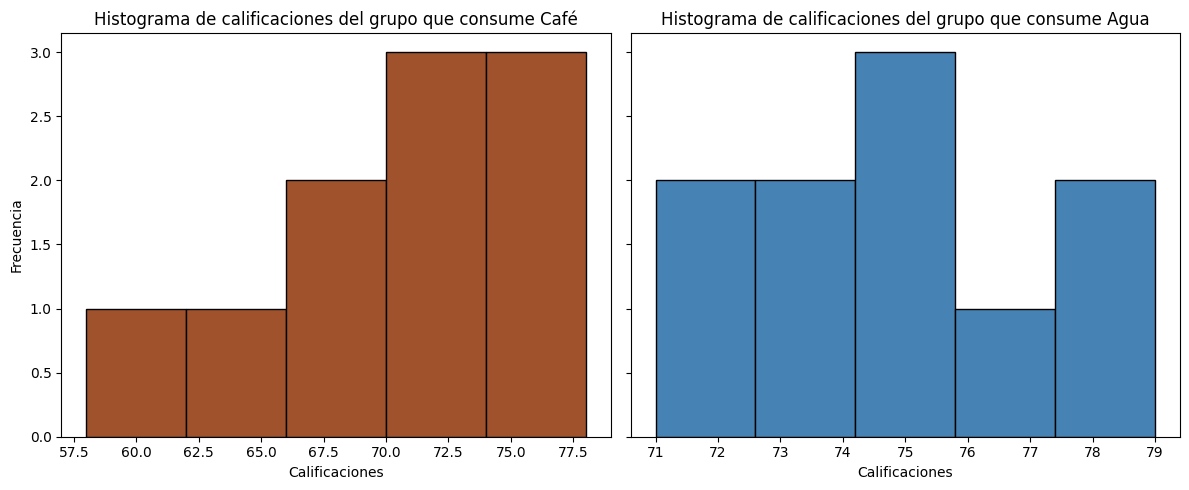

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

df_cafe = df_students[df_students['Grupo'] == 'Café']
df_agua = df_students[df_students['Grupo'] == 'Agua']

# Histograma Café (Izquierda)
axes[0].hist(df_cafe['Calificaciones'], bins=5, edgecolor='black', color='#A0522D')
axes[0].set_title('Histograma de calificaciones del grupo que consume Café')
axes[0].set_xlabel('Calificaciones')
axes[0].set_ylabel('Frecuencia')

# Histograma Agua (Derecha)
axes[1].hist(df_agua['Calificaciones'], bins=5, edgecolor='black', color='#4682B4')
axes[1].set_title('Histograma de calificaciones del grupo que consume Agua')
axes[1].set_xlabel('Calificaciones')

plt.tight_layout()
plt.show()

Pregunta 19

In [13]:
import pandas as pd

# Crea el DataFrame con los datos
df_examen = pd.DataFrame({
    'Aprobó': [45, 20],
    'Reprobó': [5, 30]
}, index=['Tomó el curso', 'No tomó el curso'])

# Extrae solo la fila correspondiente a "Tomó el curso"
estudiantes_curso = df_examen.loc['Tomó el curso']

# Calcula la probabilidad condicional (Aprobó / Total de la fila)
prob_condicional = estudiantes_curso['Aprobó'] / estudiantes_curso.sum()

print(f"Resultado: {prob_condicional}")

Resultado: 0.9


Pregunta 20

In [14]:
total_aprobados = df_examen['Aprobó'].sum()
total_estudiantes = df_examen.sum().sum()

prob_simple_aprobar = total_aprobados / total_estudiantes

print(f"La probabilidad simple de aprobar es: {prob_simple_aprobar}")

La probabilidad simple de aprobar es: 0.65
